# Supervised Learning with Scikit-Learn


**Lesson Goals**

This lesson will serve as an introduction to supervised learning using Scikit-learn. Two important algorithms will be covered along with implementation and examples.


**Introduction**

Supervised learning is an extremely important part of machine learning. This is because a large portion of machine learning algorithms are used for classification and regression. The scikit-learn has implementations for a large number of supervised learning algorithms. In this lesson we will explore two algorithms in depth.


**Linear Regression**

Definition

Linear regression is one of the most used models in statistics. The general idea behind this model is that we have a predictor (or independent) variables and one or more response (also known as target or dependent) variables. We would like to to predict our response variable using a linear combination of the predictor variables. Typically, for a set of predictor variables X 1, X 2,..., X n, and a response variable Y, we construct the following model: 

![](../linreg.png)

Where β 0, β 1,...,β n are constants that we compute. We find the optimal values of these constants for each model based on the data. We then generate predictions using this model. The difference between the observed values and the predicted values is called the error (or residual). Our goal is to minimize the error.
Linear Regression with Scikit-learn

Linear regression in scikit-learn is performed using the linear_regression submodule. To demonstrate a linear model with scikit-learn, we will use the beer dataset.

First we import the dataset using Pandas.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

beer = pd.read_csv('../lager_antioxidant_reg.csv')
beer.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


The dataset contains 7 variables :

    tpc - Total phenolic content
    ma - melanoidin content
    dsa - DPPH radical scavenging activity
    asa - ABTS radical cation scavenging activity
    orac - Oxygen radical absorbance activity
    rp - Reducing Power
    mca - Metal Chelaing Activity

The next step for scikit-learn is to separate the dataset into two parts - the predictor variables and the response variable. In this case we would like to predict the level of total phenolic content using the remaining 6 variables.

In [2]:
x_columns = [col for col in beer.columns.values if col != "tpc"]
beer_x = beer[x_columns]
beer_y = beer["tpc"]

In [3]:
beer_model = LinearRegression()
#create the model
beer_model.fit(beer_x, beer_y)
#now we print the model coefficients
beer_model.intercept_

18.830383913148466

In [4]:
beer_model.coef_

array([ 5.84731786e-02,  1.28827809e+00,  1.27650959e+02, -6.14737240e-01,
       -1.09375291e+00,  7.35403422e+01,  3.76892085e-01])

In [5]:
#score returns the coefficient of determination or r squared. 
#This number tells us what proportion of the variation in the data is explained by the model
beer_model.score(beer_x, beer_y)

0.8219280156188545

What these coefficients mean is that our linear model is:

tpc = 19.049664352739313 = 1.28791969 * ma + 125.33843146 * dsa + (-0.92370963) * asa + (-0.93261523) * orac + 76.61686364 * rp + 0.38036155 * mca

Typically, we perform a few diagnostic tests to ensure that a linear model is the most appropriate choice for this data.

    The predictor variables are linearly independent
    There is a linear relationship between predictors and response
    The errors have a constant variance
    The errors are normally distributed

As far as testing assumptions, we will focus on the last two. We will plot the residuals vs. fit plot to diagnose a problem with assumption number 3. A model that meets this assumption will have a random pattern of points in this plot. This means that there is no trend in the variance of the residuals.

This plot exists in the yellowbrick library. We will install this library and then use our existing linear model to plot the residual vs. fit graph.

#!pip install yellowbrick

C:\Users\Angel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.8219280156188545


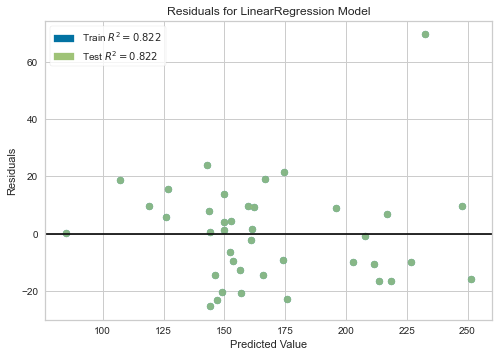

In [6]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(beer_model, hist=False)
visualizer.fit(beer_x, beer_y)  # Fit the training data to the model
print (visualizer.score(beer_x, beer_y))  
visualizer.poof()

We see that except for one outlier, we have a fairly random pattern. So the assumption is met.

Now we will look at the 4th assumption. In order to examine the distribution of the residuals, we can plot a Normal QQ plot of the residuals. This plot will compare the residuals with a theoretical normal distribution. If the graph of the actual vs. the theoretical will produce a linear pattern, this means that the residuals are approximately normally distributed.

To do this, we use the statsmodels library

#!pip install patsy
#!pip install statsmodels

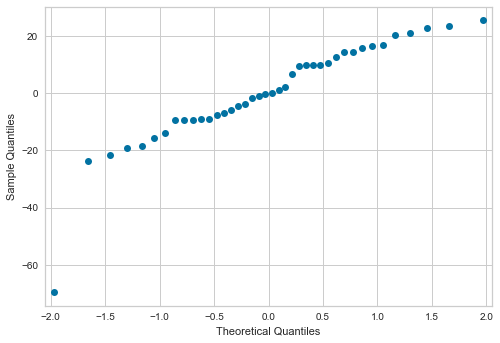

In [7]:
import statsmodels.api as sm

predictions = beer_model.predict(beer_x)
residuals = beer_y - predictions
plot=sm.qqplot(residuals)

Since we have a linear relationship, we can assume that the residuals are normally distributed.


**Logistic Regression**

While linear regression is used for predicting a numeric variable, logistic regression is used for classification. Logistic is used to explain a relationship between the predictor variables and a response variable(s) that can take values of either 0 or 1. Logistic regression does not need to satisfy the same assumptions as linear regression. The only assumptions we need to satisfy are that the predictor variables are independent of each other and not correlated with each other. We also need the response variable to be binary (meaning, have only two possible values) and the residuals to be independent of each other.

Our regression equation is:
    
![](../logreg.png)

Where p̂ (pronounced p hat) is the predicted probability of success. Notice that we have our regression equation in the exponent.
Logistic Regression with Scikit-learn

Here we use the linear_model submodule from scikit-learn as well. We will be applying the logistic regression model to the famous Titanic dataset from Kaggle.

Before we apply the model to the data, we must do some essential munging.

First, let's look at the data using the head function. 

In [8]:
titanic = pd.read_csv('../titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We see that there is a number of columns that convey information that cannot be modeled. Particularly the Name and Ticket columns. We will delete these features from the dataset. Additionally, the PassengerId column contains a number that is simply incremented with every row and contains no information about the data. We will drop this column as well.

We also see that there are quite a few NaNs in the Cabin column. Let's investigate how many NaNs we have in each column to evaluate how to address the missing data.

In [9]:
titanic_drop = titanic.drop(columns=['Name', 'Ticket', 'PassengerId'])
titanic_drop.isnull().sum(axis = 0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

We can see the NaN count for each column. The Cabin column has 687 NaNs. With so much missing data, we are better off just dropping this column all together.

We have identified 4 columns for dropping. Let's drop them using the drop function in Pandas. 

In [10]:
titanic_drop = titanic.drop(columns=['Name', 'Ticket', 'PassengerId', 'Cabin'])

To address the remaining missing data, we will drop all rows that contain at least one NaN.

In [11]:
titanic_missing = titanic_drop.dropna()
titanic_missing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
titanic_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


We now have 712 rows and 8 columns

As we can see, there is still one more step before we can model the data, we need to create dummy variables out of the Pclass, Sex, and Embarked columns.

In [13]:
titanic_with_dummies = pd.get_dummies(titanic_missing, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
titanic_with_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


At this point, we can perform the logistic regression. We start, as before, by separating the data into predictor and response variables. Then we create a model. We look at the r squared for the model using the score function. This number explains what percent of the variation in the data is explained by our model. The more variation our model can explain, the better it is at producing predictions.



In [16]:
from sklearn.linear_model import LogisticRegression

x_columns = [col for col in titanic_with_dummies.columns.values if col != "Survived"]
titanic_x = titanic_with_dummies[x_columns]
titanic_y = titanic_with_dummies["Survived"]
titanic_model = LogisticRegression(solver='lbfgs', max_iter=400)
titanic_model.fit(titanic_x, titanic_y)
titanic_model.score(titanic_x, titanic_y)

0.8047752808988764

Our model predicts almost 80% of the variation in the data.


**ROC Curve**

The ROC (or Receiving Operator Characteristic) curve is a graph that gives us more information about how well our classification algorithm classifies our data. The goal is to increase the area under the curve as much as possible. If the area under the curve is below the y = x line, this means that our algorithm is worse than a coin flip. Therefore, we must aspire to be at least above that line. However, what we really aspire to is an area of 0.9 or higher.

This plot utilizes matplotlib. Additionally, we will compute the true positive rate and false positive rate (tpr, fpr) to generate this plot.

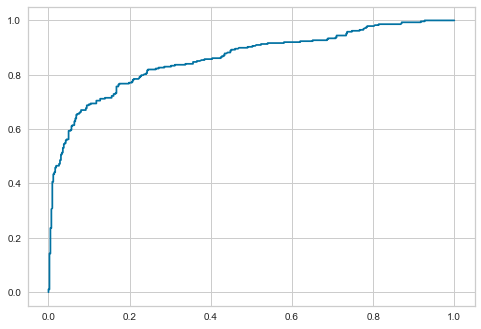

In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = titanic_model.predict_proba(titanic_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(titanic_y,  y_pred_proba)
auc = metrics.roc_auc_score(titanic_y, y_pred_proba)
plt.plot(fpr,tpr);


We can see that the area under the curve is larger than the x = y diagonal. In fact, we have computed it to be over 0.85.

In [27]:
auc

0.8590801886792454